# Error Propagation - Liq Only
- This workbook demonstrates how to investigate the effect of uncertainty on calculated temperatures for liquid-only thermometers
- You should use this as a nice simple example to understand how Thermobar can add noise
- You can download the required excel spreadsheet at https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Error_propagation/Liquid_Errors.xlsx

### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

## This sets plotting parameters

In [3]:
# This sets some plotting things
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

##  Example 1: Absolute errors in wt%
- input spreadsheet has absolute errors (in wt%) as column headings (e.g., from experimental studies where they report 1 sigma uncertainties)
- We want to generate N synthetic liquids for each measured liquid whose parameters vary within these error bounds. 

In [4]:
# this cell loads the oxide data, e.g., colum headings SiO2_Liq, MgO_Liq etc. 
out=pt.import_excel('Liquid_Errors.xlsx', sheet_name="Error_Example_Abs")
my_input=out['my_input']
myLiquids1=out['Liqs']

In [5]:
# This cell loads the errors, reading from columns SiO2_Liq_Err, MgO_Liq_Err etc. 
out_Err=pt.import_excel_errors('Liquid_Errors.xlsx', sheet_name="Error_Example_Abs")
myLiquids1_Err=out_Err['Liqs_Err']
myinput_Out=out_Err['my_input_Err']

In [6]:
# Check everything has read in correctly
display(myLiquids1_Err.head())
display(myLiquids1.head())

,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,Cr2O3_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3Fet_Liq_Err,NiO_Liq_Err,CoO_Liq_Err,CO2_Liq_Err,Sample_ID_Liq_Err,P_kbar_Err,T_K_Err
0,0.168800,0.094674,0.352282,0.185453,0.003443,0.423718,0.185089,0.424152,0.273896,0.007649,0.011024,0.2,0.0,0.0,0.0,0.0,0,0.1,5
1,0.273773,0.043005,0.128686,0.348039,0.062106,0.422937,0.427487,0.255009,0.455046,0.005722,0.032563,0.2,0.0,0.0,0.0,0.0,1,0.1,5
2,0.216526,0.045624,0.037117,0.368804,0.097813,0.007730,0.458202,0.160674,0.332565,0.002960,0.006635,0.2,0.0,0.0,0.0,0.0,2,0.1,5
3,0.984937,0.008604,0.125205,0.330998,0.065548,0.393717,0.369659,0.055583,0.194877,0.003742,0.001138,0.2,0.0,0.0,0.0,0.0,3,0.1,5
4,0.661858,0.053289,0.408826,0.153988,0.063849,0.192904,0.463465,0.117601,0.316096,0.006090,0.021499,0.2,0.0,0.0,0.0,0.0,4,0.1,5


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,57.023602,0.623106,16.332899,4.36174,0.103851,4.19180,6.94858,3.59702,0.896895,0.000000,0.226584,5.59,0.0,0.0,0.0,0.0,0
1,57.658600,0.654150,17.194799,3.90621,0.084105,2.86892,5.91538,3.85948,1.018600,0.000000,0.214935,6.55,0.0,0.0,0.0,0.0,1
2,60.731201,0.862054,17.144199,4.07781,0.077488,2.50867,5.22075,4.45556,1.414160,0.000000,0.319638,3.14,0.0,0.0,0.0,0.0,2
3,61.532799,0.440860,16.508801,3.32990,0.037520,1.64150,4.34294,4.40860,1.407000,0.000000,0.215740,6.20,0.0,0.0,0.0,0.0,3
4,52.969101,0.803412,17.563000,5.93217,0.149472,3.78351,7.65110,3.80219,0.551178,0.037368,0.196182,6.58,0.0,0.0,0.0,0.0,4


### Step 1 - Use function add_noise_sample_1phase() to add sample noise and make lots of synthetic liquids
- adds noise to myLiquids1 from a normal distribution with a mean defined by the measured value of each element, and the specified 1 sigma value (here, an absolute error given by the loaded in data myLiquids1_Err
- Specify number of resamples per liquid using "duplicates". e.g., here, make 1000 synthetic liquids per measured liquid
- By default all negative numbers are replaced with zeros, but you can set Positive=False if you don't want this behavoir

In [7]:
Liquids_only_abs_noise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, phase_err=myLiquids1_Err, 
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")


All negative numbers replaced with zeros. If you wish to keep these, set positive=False


- Here, we can look at all 1000 of the synthetic liquids generated for the first user-entered liquid (where Sample_Id=0)

In [8]:
Liquids_only_abs_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==0]

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq_Num,Sample_ID_Liq
0,57.339119,0.570542,16.217459,4.344670,0.106114,4.214361,7.012736,3.132608,0.912690,0.004592,0.219173,5.654142,0.0,0.0,0.0,0.0,0.0,0
1,57.125681,0.539742,15.938553,4.301995,0.105458,4.346012,7.027890,3.324502,0.983291,0.000000,0.231536,5.351986,0.0,0.0,0.0,0.0,0.0,0
2,57.009565,0.559875,16.585746,4.369972,0.104239,3.632659,6.916967,3.961955,0.653859,0.002472,0.248753,5.410483,0.0,0.0,0.0,0.0,0.0,0
3,56.773927,0.717600,16.431267,4.365192,0.104798,4.294141,7.123197,3.684921,0.877529,0.015985,0.230147,5.898848,0.0,0.0,0.0,0.0,0.0,0
4,56.912873,0.667839,16.087009,4.422715,0.095112,4.067635,6.656492,3.612580,1.485076,0.000000,0.216596,5.379585,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,57.114978,0.732298,16.061787,4.212279,0.106915,3.812969,7.126286,2.087145,0.533055,0.013073,0.226516,5.632316,0.0,0.0,0.0,0.0,0.0,0
996,56.949382,0.684101,16.485557,4.327049,0.098417,3.968041,7.184717,3.736068,0.605825,0.001030,0.221936,5.497267,0.0,0.0,0.0,0.0,0.0,0
997,56.899779,0.701287,16.573631,3.974402,0.102925,3.537189,6.957506,4.039582,1.144930,0.000000,0.223950,5.405451,0.0,0.0,0.0,0.0,0.0,0
998,57.256831,0.746110,16.391035,4.240407,0.101621,4.936834,6.814363,3.575518,1.002793,0.000000,0.217243,5.664682,0.0,0.0,0.0,0.0,0.0,0


- We can plot some elements up against the user-entered 1 sigma to verify how the code is working

Text(0.5, 0, 'MnO Liquid')

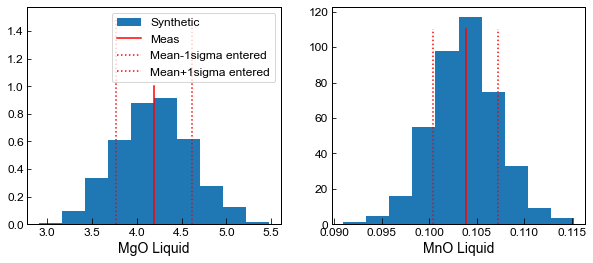

In [9]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(Liquids_only_abs_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==0, 'MgO_Liq'], 
         label='Synthetic', density=True)  ;
ax1.plot([myLiquids1['MgO_Liq'].iloc[0], myLiquids1['MgO_Liq'].iloc[0]], [0, 1], '-r', label='Meas')
ax1.plot([myLiquids1['MgO_Liq'].iloc[0]-myLiquids1_Err['MgO_Liq_Err'].iloc[0], 
          myLiquids1['MgO_Liq'].iloc[0]-myLiquids1_Err['MgO_Liq_Err'].iloc[0]], 
         [0, 1.5], ':r', label='Mean-1sigma entered')
ax1.plot([myLiquids1['MgO_Liq'].iloc[0]+myLiquids1_Err['MgO_Liq_Err'].iloc[0], 
          myLiquids1['MgO_Liq'].iloc[0]+myLiquids1_Err['MgO_Liq_Err'].iloc[0]], 
         [0, 1.5], ':r', label='Mean+1sigma entered')
ax1.set_xlabel('MgO Liquid')
ax1.legend()

ax2.hist(Liquids_only_abs_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==0, 'MnO_Liq'],
         label='Synthetic', density=True)  ;
ax2.plot([myLiquids1['MnO_Liq'].iloc[0], myLiquids1['MnO_Liq'].iloc[0]], [0, 110], '-r', label='Ent. Value')
ax2.plot([myLiquids1['MnO_Liq'].iloc[0]-myLiquids1_Err['MnO_Liq_Err'].iloc[0], 
          myLiquids1['MnO_Liq'].iloc[0]-myLiquids1_Err['MnO_Liq_Err'].iloc[0]], 
         [0, 110], ':r', label='Mean-1sigma entered')
ax2.plot([myLiquids1['MnO_Liq'].iloc[0]+myLiquids1_Err['MnO_Liq_Err'].iloc[0], 
          myLiquids1['MnO_Liq'].iloc[0]+myLiquids1_Err['MnO_Liq_Err'].iloc[0]], 
         [0, 110], ':r', label='Mean+1sigma entered')
ax2.set_xlabel('MnO Liquid')



### Step 2 -  input this synthetic dataframe into the functions for calculating temperature
- Here, using equation 22 of Putirka (2008), where DMg ol-liq is calculated theoretically using DMg from Beattie (1993) so this can be used as an olivine-only thermometer

In [10]:
T_noise=pt.calculate_liq_only_temp(liq_comps=Liquids_only_abs_noise, equationT="T_Put2008_eq22_BeattDMg", 
                                   P=5)


### Step 3 - Plot the results
- In this plot we show the histogram for the temperature from each liquid for liquid 1, 2, 3, and 4 (for all 1000 synthetic liquids generated from each measured liquid)
- All synthetic liquids generated from a single input liquid have the same value of 'Sample_ID_Liq_Num'

Text(0, 0.5, 'Probability Density')

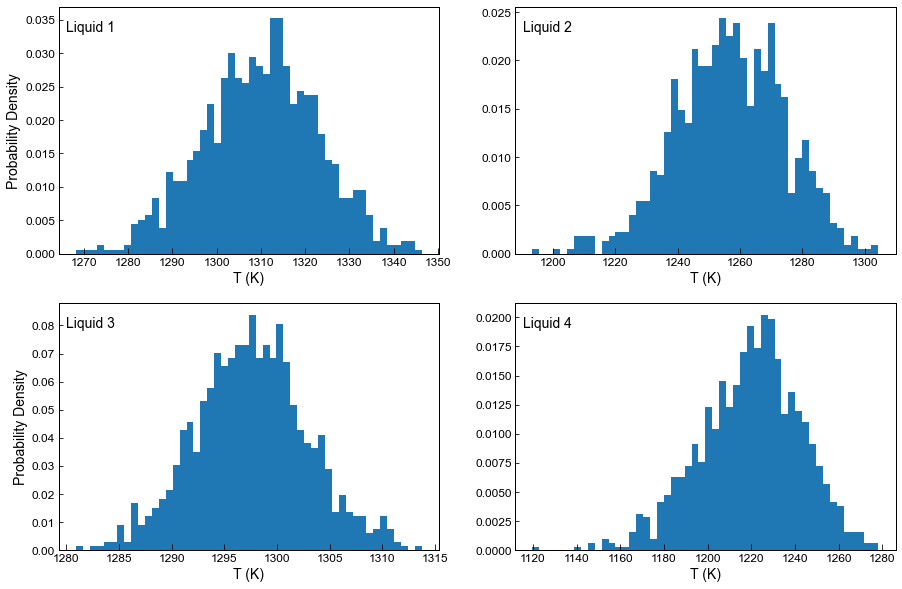

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
ax1.annotate("Liquid 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=14)
ax1.hist(T_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==0], bins=50, density=True);
ax2.annotate("Liquid 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=14)
ax2.hist(T_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==1], bins=50, density=True);
ax3.annotate("Liquid 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=14)
ax3.hist(T_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==2], bins=50, density=True);
ax4.annotate("Liquid 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=14)
ax4.hist(T_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==3], bins=50, density=True);
ax1.set_xlabel('T (K)')
ax2.set_xlabel('T (K)')
ax4.set_xlabel('T (K)')
ax3.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')

### Step 4 - Use a function to get the mean, median and standard deviation for each liquid
The two arguements for this function are:
1) The panda series you want to average (in this case, temperature)
2) The panda series of values you want to average by, e.g., here averaging all samples with the same sample ID.

In [12]:
Stats_T_K=pt.av_noise_samples_series(T_noise, Liquids_only_abs_noise['Sample_ID_Liq_Num'])
Stats_T_K

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1000,1309.902145,1310.380062,13.093340,1346.365944,1268.209389
1,1.0,1000,1256.813446,1257.032875,17.370469,1304.352787,1193.437455
2,2.0,1000,1297.558476,1297.505347,5.320186,1313.744696,1280.892252
3,3.0,1000,1219.449607,1221.116468,23.046260,1278.109314,1119.734577
4,4.0,1000,1283.170342,1282.914869,7.092503,1307.488163,1258.829138
5,5.0,1000,1269.331119,1269.400970,3.307564,1279.595508,1258.864891
6,6.0,1000,1259.467489,1259.539682,5.811925,1278.471415,1241.752798
7,7.0,1000,1197.187020,1197.280186,4.130928,1210.318532,1182.177802
8,8.0,1000,1166.831116,1166.589258,6.831496,1188.374763,1146.182586
9,9.0,1000,1335.289418,1335.189830,9.228234,1368.818995,1300.345601


Text(0, 0.5, '1 sig error (K)')

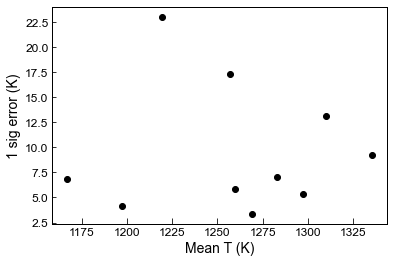

In [13]:
## You can plot these up too
plt.plot(Stats_T_K['Mean_calc'], Stats_T_K['St_dev_calc'], 'ok')
plt.xlabel('Mean T (K)')
plt.ylabel('1 sig error (K)')

## Example 2 - Making noise using percentage Errors
- Here, in the input spreadsheet we have specified a percentage error for each input (e.g., you could estimate this from EPMA analyses of secondary standards, or from EPMA software 1 sigma outputs).

In [14]:
out2=pt.import_excel('Liquid_Errors.xlsx', sheet_name="Error_Example_Perc")
my_input2=out2['my_input']
myOls2=out2['Ols']
myLiquids2=out2['Liqs']

In [15]:
out_Err2=pt.import_excel_errors('Liquid_Errors.xlsx', sheet_name="Error_Example_Perc")
myLiquids2_Err=out_Err2['Liqs_Err']
myinput2_Out=out_Err2['my_input_Err']

In [16]:
display(myLiquids2_Err.head())

,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,Cr2O3_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3Fet_Liq_Err,NiO_Liq_Err,CoO_Liq_Err,CO2_Liq_Err,Sample_ID_Liq_Err,P_kbar_Err,T_K_Err
0,1,3,5,4,10,2,3,10,10,20,5,10,0.0,0.0,0.0,0.0,0,1,1
1,1,3,5,4,10,2,3,10,10,20,5,10,0.0,0.0,0.0,0.0,1,1,1
2,1,3,5,4,10,2,3,10,10,20,5,10,0.0,0.0,0.0,0.0,2,1,1
3,1,3,5,4,10,2,3,10,10,20,5,10,0.0,0.0,0.0,0.0,3,1,1
4,1,3,5,4,10,2,3,10,10,20,5,10,0.0,0.0,0.0,0.0,4,1,1


### Step 1 - add errors based on the dataframe Liquid2_Err which are percentage errors. 
- makes 1000 liquids per user-entered row, and assume errors are normally distributed
- The difference from example 1 is now we say phase_err_type="Perc" not "Abs"
- Here, say Positive=False, which means it keeps negative numbers

In [17]:
Liquids_only_noise2=pt.add_noise_sample_1phase(phase_comp=myLiquids2, phase_err=myLiquids2_Err,
                     phase_err_type="Perc", duplicates=1000, err_dist="normal", positive=False)


In [18]:
# Validation that its calculating percentage errors right, as told it to add 1% error for SiO2. 
#This will vary a bit as you run it, as its random
Mean=np.mean(Liquids_only_noise2.loc[Liquids_only_noise2['Sample_ID_Liq_Num']==0, 'SiO2_Liq'])
std_Dev=np.nanstd(Liquids_only_noise2.loc[Liquids_only_noise2['Sample_ID_Liq_Num']==0, 'SiO2_Liq'])
100*std_Dev/Mean

1.0320514822183176

### Step 2 - calculating temperatures for all these synthetic liquids using equation 16 of Putirka (2008)

In [19]:
T_noise2=pt.calculate_liq_only_temp(liq_comps=Liquids_only_noise2, equationT="T_Put2008_eq16", P=5)

### Step 3 - Calculating standard deviations, means, and medians etc

In [20]:
Stats_T_K2=pt.av_noise_samples_series(T_noise2, Liquids_only_noise2['Sample_ID_Liq_Num'])
Stats_T_K2

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1000,1361.549592,1360.828029,21.284278,1427.380228,1299.163312
1,1.0,1000,1283.911098,1282.884993,25.482757,1377.171448,1203.308920
2,2.0,1000,1290.465315,1289.814799,27.056968,1392.414592,1201.223386
3,3.0,1000,1264.118991,1264.126248,31.298034,1359.931213,1179.901757
4,4.0,1000,1328.369298,1327.090168,16.986712,1398.653276,1281.722698
5,5.0,1000,1310.432659,1310.717497,19.262560,1397.345604,1254.534783
6,6.0,1000,1292.872374,1292.289668,22.242435,1364.322919,1219.681620
7,7.0,1000,1377.059542,1375.925314,18.501446,1443.671512,1318.683633
8,8.0,1000,1280.766252,1280.072501,21.139515,1355.840834,1225.283955
9,9.0,1000,1380.484430,1380.051080,11.631417,1421.575492,1346.935368


## Example 3: Fixed Percentage Error
- Here, instead of inputted columns with "_Err" for each oxide, we just add a fixed percentage error to all oxides (still normally distributed) - here, 1% noise for all elements

In [21]:
out3=pt.import_excel('Liquid_Errors.xlsx', sheet_name="Error_Example_Perc")
my_input3=out3['my_input']
myOls23=out3['Ols']
myLiquids3=out3['Liqs']

In [22]:
Liquids_only_noise3=pt.add_noise_sample_1phase(phase_comp=myLiquids3, duplicates=1000,
                           noise_percent=1, err_dist="normal")

All negative numbers replaced with zeros. If you wish to keep these, set positive=False


In [23]:
T_noise3=pt.calculate_liq_only_temp(liq_comps=Liquids_only_noise3, equationT="T_Put2008_eq16", P=5)

In [24]:
Stats_T_K3=pt.av_noise_samples_series(T_noise3, Liquids_only_noise3['Sample_ID_Liq_Num'])
Stats_T_K3

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1000,1361.134227,1361.014088,4.874867,1377.428997,1345.536425
1,1.0,1000,1283.517820,1283.640891,5.621473,1304.141379,1261.999314
2,2.0,1000,1289.716326,1289.416605,6.123934,1309.231428,1270.773626
3,3.0,1000,1262.756037,1263.181094,7.896493,1285.546263,1226.593845
4,4.0,1000,1327.388976,1327.359885,3.720417,1340.641267,1313.075183
5,5.0,1000,1310.250896,1310.103947,4.181113,1326.058457,1297.251874
6,6.0,1000,1292.005423,1291.920835,4.941247,1308.997040,1276.200752
7,7.0,1000,1375.892616,1375.747240,4.304133,1389.734398,1362.732758
8,8.0,1000,1279.485243,1279.484153,4.344912,1292.641127,1261.964871
9,9.0,1000,1381.030949,1380.944036,2.966598,1391.854457,1371.505604


## Example 4: Perc uncertainty in a single input parameter
- Here, want to add 5% error to just MgO in the liquid. You don't have to specify _Liq, it adds this based on what you entered. 

In [25]:
Liquids_only_noise4=pt.add_noise_sample_1phase(phase_comp=myLiquids1, variable="MgO", variable_err=5, 
                                              variable_err_type="Perc", duplicates=1000, err_dist="normal")


All negative numbers replaced with zeros. If you wish to keep these, set positive=False


In [26]:
T_noise4=pt.calculate_liq_only_temp(liq_comps=Liquids_only_noise4, equationT="T_Put2008_eq16", P=5)

In [27]:
Stats_T_K4=pt.av_noise_samples_series(T_noise4, Liquids_only_noise4['Sample_ID_Liq_Num'])
Stats_T_K4

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1000,1361.324037,1361.582552,6.392147,1378.325808,1335.150336
1,1.0,1000,1283.689998,1283.715019,5.468439,1301.527086,1266.072391
2,2.0,1000,1289.456819,1289.332550,4.431946,1305.173292,1273.517673
3,3.0,1000,1262.638115,1262.769202,3.150895,1272.859712,1252.423406
4,4.0,1000,1327.275815,1327.508849,6.504264,1346.903228,1304.674573
5,5.0,1000,1310.108091,1310.280959,5.949882,1333.104461,1291.936559
6,6.0,1000,1291.874784,1292.038464,5.050548,1309.241646,1276.252972
7,7.0,1000,1376.073899,1376.088693,7.466990,1398.559068,1356.357994
8,8.0,1000,1279.706683,1279.843350,6.927670,1302.585541,1259.975205
9,9.0,1000,1380.751258,1381.059421,8.486740,1409.936152,1350.552863


## Example 5: Absolute uncertainty in a given input parameter
- Here, say uncertainty in H2O content of the liquid is +-1 wt%

In [28]:
Liquids_only_noise5=pt.add_noise_sample_1phase(phase_comp=myLiquids1, variable="H2O", variable_err=1, 
                                              variable_err_type="Abs", duplicates=1000, err_dist="normal")


All negative numbers replaced with zeros. If you wish to keep these, set positive=False


### plot a histogram of resulting H2O distribution

Text(0, 0.5, 'Probability Density')

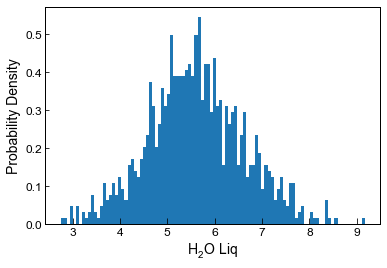

In [29]:
plt.hist(Liquids_only_noise5.loc[Liquids_only_noise4['Sample_ID_Liq_Num']==0, 'H2O_Liq'], bins=100, density= True);
plt.xlabel('H$_2$O Liq')
plt.ylabel('Probability Density')

### Now feed this into a thermometer

Text(0.5, 0, 'T (K)')

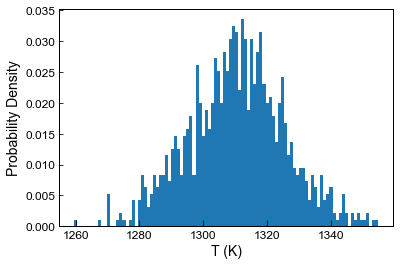

In [30]:
#Feed into a thermometer
T_noise5=pt.calculate_liq_only_temp(liq_comps=Liquids_only_noise5, equationT="T_Put2008_eq22_BeattDMg", 
                              P=5)
plt.hist(T_noise5.loc[Liquids_only_noise5['Sample_ID_Liq_Num']==0], bins=100, density=True);
plt.ylabel('Probability Density')
plt.xlabel('T (K)')

In [31]:
Stats_T_K5=pt.av_noise_samples_series(T_noise5, Liquids_only_noise5['Sample_ID_Liq_Num'])
Stats_T_K5

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1000,1310.446098,1310.488990,14.985740,1354.822164,1259.449375
1,1.0,1000,1258.556146,1257.993042,13.132467,1309.475327,1218.984410
2,2.0,1000,1297.688214,1297.365790,14.523009,1345.233068,1254.768252
3,3.0,1000,1221.298201,1221.376857,12.551356,1262.408269,1185.549858
4,4.0,1000,1282.783981,1282.844986,13.828206,1329.398621,1245.518315
5,5.0,1000,1269.043852,1268.805220,14.267293,1312.629549,1228.703445
6,6.0,1000,1259.207648,1258.678080,13.493764,1312.263118,1216.051498
7,7.0,1000,1197.326114,1196.895067,12.169079,1233.714918,1161.138675
8,8.0,1000,1167.487727,1167.236479,11.414431,1201.618012,1134.335560
9,9.0,1000,1335.204744,1335.372128,15.733560,1399.270430,1283.412667


## Example 6 - Uniformly distributed errors
- by default, the code assumes a normal distribution of errors, calculated using the user-inputted 1 sigma value
- you can also state err_dist="uniform", to generate uniformly distributed noise between +-inputted value

In [32]:
Liquids_only_noise6=pt.add_noise_sample_1phase(phase_comp=myLiquids1, variable="H2O", variable_err=0.5, 
                                              variable_err_type="Abs", duplicates=1000, err_dist="uniform")


All negative numbers replaced with zeros. If you wish to keep these, set positive=False


Text(0.5, 0, 'T (K)')

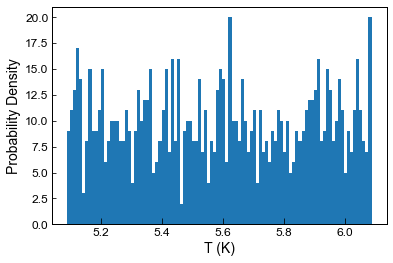

In [33]:
plt.hist(Liquids_only_noise6.loc[Liquids_only_noise6['Sample_ID_Liq_Num']==0, 'H2O_Liq'], bins=100);
plt.ylabel('Probability Density')
plt.xlabel('T (K)')